In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

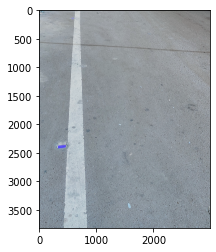

In [2]:
image = cv.imread('road.jpg')
plt.imshow(image)

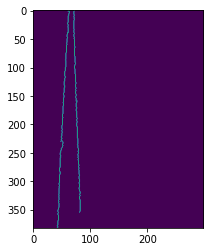

In [3]:
image = cv.resize(image.copy(), (0, 0), fx = 0.1, fy = 0.1)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (15,15), 0)
edges = cv.Canny(blur, 10, 80)
(height, width) = image.shape[:2]
plt.imshow(edges)

**Hough Transform**

We use the equation $xcos\theta+ysin\theta = \rho$

For different values of x and y in image space we generate $\theta$ and $\rho$ values in parameter space. We store these values in accumulator space and perform voting. Then we select the parameters according to the votes 

In [4]:
d = int(round(np.sqrt(np.square(height)+np.square(width))))
thetas = np.arange(0, 180, step=1)
rhos = np.arange(-d, d, step=(2*d)/180)
cos_thetas = np.cos(np.deg2rad(thetas))
sin_thetas = np.sin(np.deg2rad(thetas))
accumulator = np.zeros((len(thetas), len(rhos)))

In [5]:
y_i, x_i = np.nonzero(edges)
for y,x in zip(y_i,x_i):
  for theta_idx in range(len(thetas)):
    rho = (x * cos_thetas[theta_idx]) + (y * sin_thetas[theta_idx])
    theta = thetas[theta_idx]
    rho_idx = np.argmin(np.abs(rhos - rho))
    accumulator[rho_idx][theta_idx] += 1


True

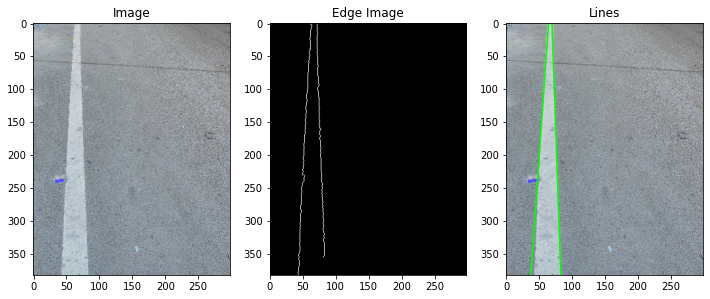

In [6]:
figure = plt.figure(figsize=(12, 12))
subplot1 = figure.add_subplot(1, 3, 1)
subplot1.imshow(image)
subplot1.title.set_text("Image")

subplot2 = figure.add_subplot(1, 3, 2)
subplot2.imshow(edges, cmap="gray")
subplot2.title.set_text("Edge Image")

subplot3 = figure.add_subplot(1, 3, 3)
subplot3.imshow(image)
subplot3.title.set_text("Lines")

for y in range(accumulator.shape[0]):
  for x in range(accumulator.shape[1]):
    if accumulator[y][x] > 300:
      rho = rhos[y]
      theta = thetas[x]
      a = np.cos(np.deg2rad(theta))
      b = np.sin(np.deg2rad(theta))
      rho_cos = (a * rho)
      rho_sin = (b * rho)
      x1 = int(rho_cos + 500 * (-b))
      y1 = int(rho_sin + 500 * (a))
      x2 = int(rho_cos - 500 * (-b))
      y2 = int(rho_sin - 500 * (a))
      subplot3.add_line(mlines.Line2D([x1, x2], [y1, y2], color = (0,1,0)))
      cv.line(image,pt1=(x1,y1),pt2=(x2,y2),color=(0,255,0),thickness=2)

cv.imwrite('roads_result.jpg', image)
